In [1]:
#We will be making use of Librosa library
!pip install librosa

  Using cached librosa-0.8.0.tar.gz (183 kB)
  Using cached audioread-2.1.9.tar.gz (377 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201375 sha256=f79426f74e61df88732ac7813b8415339a043401605e5eaeb5d74f6375f1c77e
  Stored in directory: c:\users\harsh\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=ebfc152bfa3f4393631c9058161cd05db3b012526ac9511eb13c8a6107a3eef7
  Stored in directory: c:\users\harsh\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=6ce3e925a3cec831099e32733

In [3]:
import  matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [7]:
#Using a sample audio file for EDA purpose
filename = 'F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/dogbark.wav'

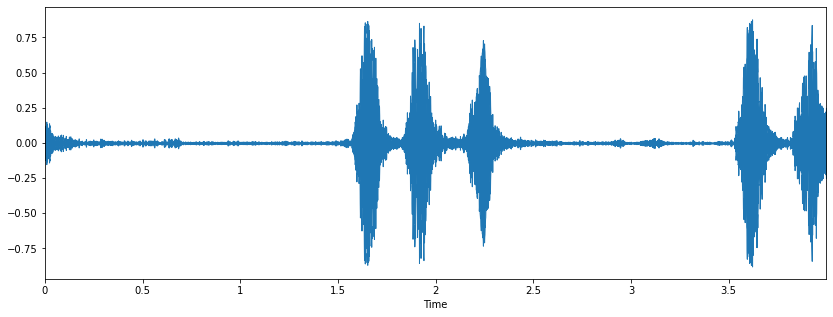

In [16]:
plt.figure(figsize=(14,5))
#We can fetch out the data i.e numerical representation of signals in audio
#We can also fetchout the sample rate of the audio using Librosa library
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [9]:
#We can also fetchout the sample rate of the audio using Librosa library
sample_rate

22050

In [10]:
#We can fetch out the data i.e numerical representation of signals in audio
data

array([ 0.04002732,  0.03780286, -0.00341219, ..., -0.09167336,
       -0.10423895, -0.12120791], dtype=float32)

In [11]:
import pandas as pd
metadata = pd.read_csv('F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
#Check whether the dataset is balanced or not
metadata['class'].value_counts()

dog_bark            1000
jackhammer          1000
children_playing    1000
drilling            1000
street_music        1000
engine_idling       1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Audio Classification Data Preprocessing

In [17]:
mfccs = librosa.feature.mfcc(y=data,sr= sample_rate,n_mfcc = 40)
print(mfccs.shape)

(40, 173)


In [19]:
mfccs

array([[-217.80705   , -236.33252   , -278.48648   , ...,  -76.70107   ,
        -106.100945  , -147.24713   ],
       [ 160.59698   ,  169.84987   ,  163.69159   , ...,   75.00237   ,
         109.26108   ,  143.62149   ],
       [ -34.126072  ,  -30.903543  ,  -15.3853245 , ...,  -81.29822   ,
         -59.96541   ,  -48.604736  ],
       ...,
       [   2.835308  ,    3.225158  ,    5.629803  , ...,   10.656957  ,
           9.100239  ,    6.8464165 ],
       [  -5.771242  ,   -3.8947082 ,   -0.91024685, ...,    5.871058  ,
          10.971737  ,    7.9285264 ],
       [  -7.1253405 ,   -5.5669413 ,   -2.8750958 , ...,    1.3647599 ,
          -1.1268764 ,   -0.9765974 ]], dtype=float32)

In [88]:
mfccs.shape

(40, 173)

# Lets start working on the audio file dataset.

In [21]:
import pandas as pd
import os
import librosa

audio_dataset_path = 'F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/audio'
metadata = pd.read_csv('F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [100]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [24]:
import numpy as np
#using tqdm so that we can see the progress as well
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    
    #after fetching the name of each file from csv file ,we will pas this file name to features_extractor fn in order to get mfcc_scaled_features
    data=features_extractor(file_name)
    #appending the data and final class labels to a list(i.e extracted_features) so that we can later convert this list into a DataFrame
    extracted_features.append([data,final_class_labels])

3555it [06:15, 12.27it/s]C:\Users\Harsh\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [13:49, 16.59it/s]C:\Users\Harsh\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8328it [13:49, 18.87it/s]C:\Users\Harsh\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [14:19, 10.17it/s]


In [101]:
#Converting the list to the DataFrame
extracted_features_df =pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [106]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [107]:
extracted_features_df['class']

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [108]:
extracted_features_df['feature']

0       [-215.79301, 71.66612, -131.81377, -52.091335,...
1       [-424.68677, 110.56227, -54.148235, 62.01074, ...
2       [-459.56467, 122.800354, -47.92471, 53.265705,...
3       [-414.55377, 102.896904, -36.66495, 54.18041, ...
4       [-447.397, 115.0954, -53.809113, 61.60859, 1.6...
                              ...                        
8727    [-399.2257, 136.81903, -51.964222, 37.02399, -...
8728    [-346.72733, 87.48847, -46.265022, 52.748833, ...
8729    [-304.61316, 112.6199, -47.161945, 37.00349, -...
8730    [-344.71423, 126.75813, -56.17717, 36.070927, ...
8731    [-315.93384, 95.67589, -38.047768, 47.50074, -...
Name: feature, Length: 8732, dtype: object

In [109]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [112]:
#output of X.shape will be 8732 rows and 40 features
X.shape

(8732, 40)

In [111]:
y.shape

(8732,)

In [114]:
# y=np.array(pd.get_dummies(y))
# We will be using LabelEncoder so that while testing with some random audio we can easily find out the name of the class predicted by the model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [116]:
y[14]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [117]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [118]:
#X_train has 6985 rows and 40 features
X_train.shape

(6985, 40)

In [119]:
X_test.shape

(1747, 40)

In [122]:
y_train.shape

(6985, 10)

In [123]:
y_test.shape

(1747, 10)

# Creating a Neural Network Model

In [124]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [131]:
# Getting the Number of classes (output will be 10 since y had 8732 rows and 10 number of classes)
# if we print y.shape[0] then the output will be 8732
num_labels=y.shape[1]
num_labels

10

In [132]:
model=Sequential()
###first layer
#we have given input_shape =(40,) because  initially we had X.shape as (8732 ,40)
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [133]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [134]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [135]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
219/219 [==============================] - ETA: 0s - loss: 10.8907 - accuracy: 0.1221
Epoch 00001: val_loss improved from inf to 2.28793, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 10.8907 - accuracy: 0.1221 - val_loss: 2.2879 - val_accuracy: 0.1139
Epoch 2/500
200/219 [==========================>...] - ETA: 0s - loss: 2.6035 - accuracy: 0.1173
Epoch 00002: val_loss improved from 2.28793 to 2.27710, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.5930 - accuracy: 0.1174 - val_loss: 2.2771 - val_accuracy: 0.1156
Epoch 3/500
207/219 [===========================>..] - ETA: 0s - loss: 2.3368 - accuracy: 0.1285
Epoch 00003: val_loss improved from 2.27710 to 2.24718, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved

202/219 [==========================>...] - ETA: 0s - loss: 1.5632 - accuracy: 0.4451
Epoch 00022: val_loss improved from 1.40652 to 1.38905, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.5656 - accuracy: 0.4458 - val_loss: 1.3890 - val_accuracy: 0.5260
Epoch 23/500
206/219 [===========================>..] - ETA: 0s - loss: 1.5244 - accuracy: 0.4540
Epoch 00023: val_loss improved from 1.38905 to 1.33548, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.5197 - accuracy: 0.4553 - val_loss: 1.3355 - val_accuracy: 0.5633
Epoch 24/500
217/219 [============================>.] - ETA: 0s - loss: 1.4918 - accuracy: 0.4826
Epoch 00024: val_loss improved from 1.33548 to 1.29833, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\

211/219 [===========================>..] - ETA: 0s - loss: 1.1456 - accuracy: 0.6170
Epoch 00045: val_loss improved from 0.95346 to 0.94795, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.1408 - accuracy: 0.6180 - val_loss: 0.9480 - val_accuracy: 0.6846
Epoch 46/500
214/219 [============================>.] - ETA: 0s - loss: 1.1574 - accuracy: 0.6117
Epoch 00046: val_loss improved from 0.94795 to 0.94373, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.1565 - accuracy: 0.6120 - val_loss: 0.9437 - val_accuracy: 0.6783
Epoch 47/500
198/219 [==========================>...] - ETA: 0s - loss: 1.1077 - accuracy: 0.6305
Epoch 00047: val_loss improved from 0.94373 to 0.93246, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\

Epoch 00070: val_loss did not improve from 0.82667
219/219 [==============================] - 1s 3ms/step - loss: 1.0208 - accuracy: 0.6613 - val_loss: 0.8378 - val_accuracy: 0.7281
Epoch 71/500
217/219 [============================>.] - ETA: 0s - loss: 1.0075 - accuracy: 0.6587
Epoch 00071: val_loss improved from 0.82667 to 0.80007, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.0069 - accuracy: 0.6588 - val_loss: 0.8001 - val_accuracy: 0.7418
Epoch 72/500
214/219 [============================>.] - ETA: 0s - loss: 0.9947 - accuracy: 0.6622
Epoch 00072: val_loss did not improve from 0.80007
219/219 [==============================] - 1s 3ms/step - loss: 0.9969 - accuracy: 0.6621 - val_loss: 0.8079 - val_accuracy: 0.7470
Epoch 73/500
213/219 [============================>.] - ETA: 0s - loss: 0.9906 - accuracy: 0.6611
Epoch 00073: val_loss did not improve from 0.80007

Epoch 96/500
210/219 [===========================>..] - ETA: 0s - loss: 0.9380 - accuracy: 0.6854
Epoch 00096: val_loss did not improve from 0.73835
219/219 [==============================] - 1s 3ms/step - loss: 0.9360 - accuracy: 0.6859 - val_loss: 0.7388 - val_accuracy: 0.7624
Epoch 97/500
215/219 [============================>.] - ETA: 0s - loss: 0.9198 - accuracy: 0.6881
Epoch 00097: val_loss did not improve from 0.73835
219/219 [==============================] - 1s 3ms/step - loss: 0.9171 - accuracy: 0.6886 - val_loss: 0.7500 - val_accuracy: 0.7624
Epoch 98/500
203/219 [==========================>...] - ETA: 0s - loss: 0.9293 - accuracy: 0.6780
Epoch 00098: val_loss did not improve from 0.73835
219/219 [==============================] - 1s 3ms/step - loss: 0.9307 - accuracy: 0.6789 - val_loss: 0.7502 - val_accuracy: 0.7607
Epoch 99/500
218/219 [============================>.] - ETA: 0s - loss: 0.9222 - accuracy: 0.6799
Epoch 00099: val_loss did not improve from 0.73835
219/219 [==

Epoch 123/500
214/219 [============================>.] - ETA: 0s - loss: 0.8791 - accuracy: 0.7046
Epoch 00123: val_loss did not improve from 0.70730
219/219 [==============================] - 1s 3ms/step - loss: 0.8797 - accuracy: 0.7039 - val_loss: 0.7096 - val_accuracy: 0.7865
Epoch 124/500
208/219 [===========================>..] - ETA: 0s - loss: 0.9090 - accuracy: 0.6977
Epoch 00124: val_loss did not improve from 0.70730
219/219 [==============================] - 1s 3ms/step - loss: 0.9069 - accuracy: 0.6984 - val_loss: 0.7260 - val_accuracy: 0.7693
Epoch 125/500
208/219 [===========================>..] - ETA: 0s - loss: 0.9044 - accuracy: 0.6980
Epoch 00125: val_loss did not improve from 0.70730
219/219 [==============================] - 1s 3ms/step - loss: 0.9071 - accuracy: 0.6974 - val_loss: 0.7246 - val_accuracy: 0.7796
Epoch 126/500
213/219 [============================>.] - ETA: 0s - loss: 0.8961 - accuracy: 0.6963
Epoch 00126: val_loss did not improve from 0.70730
219/219

Epoch 151/500
215/219 [============================>.] - ETA: 0s - loss: 0.8871 - accuracy: 0.7096
Epoch 00151: val_loss did not improve from 0.67635
219/219 [==============================] - 1s 3ms/step - loss: 0.8895 - accuracy: 0.7087 - val_loss: 0.7249 - val_accuracy: 0.7728
Epoch 152/500
219/219 [==============================] - ETA: 0s - loss: 0.8582 - accuracy: 0.7135
Epoch 00152: val_loss did not improve from 0.67635
219/219 [==============================] - 1s 3ms/step - loss: 0.8582 - accuracy: 0.7135 - val_loss: 0.7028 - val_accuracy: 0.7768
Epoch 153/500
217/219 [============================>.] - ETA: 0s - loss: 0.8592 - accuracy: 0.7092
Epoch 00153: val_loss did not improve from 0.67635
219/219 [==============================] - 1s 3ms/step - loss: 0.8586 - accuracy: 0.7094 - val_loss: 0.6775 - val_accuracy: 0.7836
Epoch 154/500
215/219 [============================>.] - ETA: 0s - loss: 0.8968 - accuracy: 0.7063
Epoch 00154: val_loss did not improve from 0.67635
219/219

Epoch 179/500
213/219 [============================>.] - ETA: 0s - loss: 0.8537 - accuracy: 0.7237
Epoch 00179: val_loss improved from 0.66245 to 0.66081, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8587 - accuracy: 0.7227 - val_loss: 0.6608 - val_accuracy: 0.7882
Epoch 180/500
214/219 [============================>.] - ETA: 0s - loss: 0.8648 - accuracy: 0.7091
Epoch 00180: val_loss did not improve from 0.66081
219/219 [==============================] - 1s 3ms/step - loss: 0.8640 - accuracy: 0.7099 - val_loss: 0.6938 - val_accuracy: 0.7785
Epoch 181/500
212/219 [============================>.] - ETA: 0s - loss: 0.8430 - accuracy: 0.7164
Epoch 00181: val_loss did not improve from 0.66081
219/219 [==============================] - 1s 3ms/step - loss: 0.8382 - accuracy: 0.7180 - val_loss: 0.6647 - val_accuracy: 0.7853
Epoch 182/500
214/219 [========================

217/219 [============================>.] - ETA: 0s - loss: 0.8497 - accuracy: 0.7170
Epoch 00206: val_loss did not improve from 0.64340
219/219 [==============================] - 1s 3ms/step - loss: 0.8486 - accuracy: 0.7177 - val_loss: 0.6545 - val_accuracy: 0.7945
Epoch 207/500
217/219 [============================>.] - ETA: 0s - loss: 0.8254 - accuracy: 0.7239
Epoch 00207: val_loss improved from 0.64340 to 0.63439, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8264 - accuracy: 0.7233 - val_loss: 0.6344 - val_accuracy: 0.8037
Epoch 208/500
218/219 [============================>.] - ETA: 0s - loss: 0.8462 - accuracy: 0.7169
Epoch 00208: val_loss did not improve from 0.63439
219/219 [==============================] - 1s 3ms/step - loss: 0.8466 - accuracy: 0.7171 - val_loss: 0.6658 - val_accuracy: 0.7859
Epoch 209/500
216/219 [============================>.] - ETA:

216/219 [============================>.] - ETA: 0s - loss: 0.8117 - accuracy: 0.7251
Epoch 00234: val_loss did not improve from 0.63007
219/219 [==============================] - 1s 3ms/step - loss: 0.8128 - accuracy: 0.7250 - val_loss: 0.6329 - val_accuracy: 0.8025
Epoch 235/500
218/219 [============================>.] - ETA: 0s - loss: 0.8226 - accuracy: 0.7170
Epoch 00235: val_loss did not improve from 0.63007
219/219 [==============================] - 1s 3ms/step - loss: 0.8226 - accuracy: 0.7171 - val_loss: 0.6374 - val_accuracy: 0.7888
Epoch 236/500
214/219 [============================>.] - ETA: 0s - loss: 0.8053 - accuracy: 0.7288
Epoch 00236: val_loss improved from 0.63007 to 0.62241, saving model to F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8060 - accuracy: 0.7291 - val_loss: 0.6224 - val_accuracy: 0.7945
Epoch 237/500
217/219 [============================>.] - ETA:

Epoch 263/500
212/219 [============================>.] - ETA: 0s - loss: 0.8036 - accuracy: 0.7356
Epoch 00263: val_loss did not improve from 0.61871
219/219 [==============================] - 1s 3ms/step - loss: 0.8059 - accuracy: 0.7347 - val_loss: 0.6295 - val_accuracy: 0.7997
Epoch 264/500
215/219 [============================>.] - ETA: 0s - loss: 0.8068 - accuracy: 0.7305
Epoch 00264: val_loss did not improve from 0.61871
219/219 [==============================] - 1s 3ms/step - loss: 0.8078 - accuracy: 0.7310 - val_loss: 0.6369 - val_accuracy: 0.7956
Epoch 265/500
217/219 [============================>.] - ETA: 0s - loss: 0.8258 - accuracy: 0.7265
Epoch 00265: val_loss did not improve from 0.61871
219/219 [==============================] - 1s 3ms/step - loss: 0.8253 - accuracy: 0.7263 - val_loss: 0.6437 - val_accuracy: 0.8014
Epoch 266/500
213/219 [============================>.] - ETA: 0s - loss: 0.8059 - accuracy: 0.7361
Epoch 00266: val_loss did not improve from 0.61871
219/219

213/219 [============================>.] - ETA: 0s - loss: 0.8188 - accuracy: 0.7315
Epoch 00291: val_loss did not improve from 0.61332
219/219 [==============================] - 1s 3ms/step - loss: 0.8185 - accuracy: 0.7319 - val_loss: 0.6464 - val_accuracy: 0.7802
Epoch 292/500
210/219 [===========================>..] - ETA: 0s - loss: 0.8033 - accuracy: 0.7278
Epoch 00292: val_loss did not improve from 0.61332
219/219 [==============================] - 1s 3ms/step - loss: 0.8037 - accuracy: 0.7283 - val_loss: 0.6254 - val_accuracy: 0.7939
Epoch 293/500
217/219 [============================>.] - ETA: 0s - loss: 0.8197 - accuracy: 0.7225
Epoch 00293: val_loss did not improve from 0.61332
219/219 [==============================] - 1s 3ms/step - loss: 0.8203 - accuracy: 0.7224 - val_loss: 0.6395 - val_accuracy: 0.7859
Epoch 294/500
214/219 [============================>.] - ETA: 0s - loss: 0.8226 - accuracy: 0.7279
Epoch 00294: val_loss did not improve from 0.61332
219/219 [============

Epoch 320/500
218/219 [============================>.] - ETA: 0s - loss: 0.8003 - accuracy: 0.7332
Epoch 00320: val_loss did not improve from 0.60587
219/219 [==============================] - 1s 3ms/step - loss: 0.8004 - accuracy: 0.7331 - val_loss: 0.6259 - val_accuracy: 0.7945
Epoch 321/500
218/219 [============================>.] - ETA: 0s - loss: 0.7938 - accuracy: 0.7407
Epoch 00321: val_loss did not improve from 0.60587
219/219 [==============================] - 1s 3ms/step - loss: 0.7937 - accuracy: 0.7409 - val_loss: 0.6174 - val_accuracy: 0.8082
Epoch 322/500
216/219 [============================>.] - ETA: 0s - loss: 0.7794 - accuracy: 0.7387
Epoch 00322: val_loss did not improve from 0.60587
219/219 [==============================] - 1s 3ms/step - loss: 0.7825 - accuracy: 0.7379 - val_loss: 0.6093 - val_accuracy: 0.8060
Epoch 323/500
207/219 [===========================>..] - ETA: 0s - loss: 0.7939 - accuracy: 0.7372
Epoch 00323: val_loss did not improve from 0.60587
219/219

Epoch 349/500
211/219 [===========================>..] - ETA: 0s - loss: 0.8044 - accuracy: 0.7313
Epoch 00349: val_loss did not improve from 0.59721
219/219 [==============================] - 1s 3ms/step - loss: 0.8019 - accuracy: 0.7324 - val_loss: 0.6602 - val_accuracy: 0.7934
Epoch 350/500
216/219 [============================>.] - ETA: 0s - loss: 0.7767 - accuracy: 0.7405
Epoch 00350: val_loss did not improve from 0.59721
219/219 [==============================] - 1s 3ms/step - loss: 0.7768 - accuracy: 0.7402 - val_loss: 0.6195 - val_accuracy: 0.8002
Epoch 351/500
215/219 [============================>.] - ETA: 0s - loss: 0.7903 - accuracy: 0.7353
Epoch 00351: val_loss did not improve from 0.59721
219/219 [==============================] - 1s 3ms/step - loss: 0.7892 - accuracy: 0.7351 - val_loss: 0.6279 - val_accuracy: 0.8037
Epoch 352/500
215/219 [============================>.] - ETA: 0s - loss: 0.7807 - accuracy: 0.7465
Epoch 00352: val_loss did not improve from 0.59721
219/219

Epoch 378/500
199/219 [==========================>...] - ETA: 0s - loss: 0.7854 - accuracy: 0.7390
Epoch 00378: val_loss did not improve from 0.59285
219/219 [==============================] - 1s 3ms/step - loss: 0.7853 - accuracy: 0.7376 - val_loss: 0.6144 - val_accuracy: 0.8128
Epoch 379/500
199/219 [==========================>...] - ETA: 0s - loss: 0.7759 - accuracy: 0.7447
Epoch 00379: val_loss did not improve from 0.59285
219/219 [==============================] - 1s 3ms/step - loss: 0.7737 - accuracy: 0.7463 - val_loss: 0.5974 - val_accuracy: 0.8082
Epoch 380/500
200/219 [==========================>...] - ETA: 0s - loss: 0.7857 - accuracy: 0.7450
Epoch 00380: val_loss did not improve from 0.59285
219/219 [==============================] - 1s 3ms/step - loss: 0.7848 - accuracy: 0.7446 - val_loss: 0.6134 - val_accuracy: 0.8168
Epoch 381/500
212/219 [============================>.] - ETA: 0s - loss: 0.7711 - accuracy: 0.7437
Epoch 00381: val_loss did not improve from 0.59285
219/219

Epoch 407/500
214/219 [============================>.] - ETA: 0s - loss: 0.7700 - accuracy: 0.7453
Epoch 00407: val_loss did not improve from 0.58830
219/219 [==============================] - 1s 3ms/step - loss: 0.7731 - accuracy: 0.7459 - val_loss: 0.6106 - val_accuracy: 0.8048
Epoch 408/500
216/219 [============================>.] - ETA: 0s - loss: 0.7944 - accuracy: 0.7407
Epoch 00408: val_loss did not improve from 0.58830
219/219 [==============================] - 1s 3ms/step - loss: 0.7935 - accuracy: 0.7410 - val_loss: 0.6553 - val_accuracy: 0.7962
Epoch 409/500
213/219 [============================>.] - ETA: 0s - loss: 0.8016 - accuracy: 0.7400
Epoch 00409: val_loss did not improve from 0.58830
219/219 [==============================] - 1s 3ms/step - loss: 0.8013 - accuracy: 0.7393 - val_loss: 0.6445 - val_accuracy: 0.7916
Epoch 410/500
210/219 [===========================>..] - ETA: 0s - loss: 0.7584 - accuracy: 0.7481
Epoch 00410: val_loss did not improve from 0.58830
219/219

208/219 [===========================>..] - ETA: 0s - loss: 0.7832 - accuracy: 0.7434
Epoch 00436: val_loss did not improve from 0.58830
219/219 [==============================] - 1s 3ms/step - loss: 0.7792 - accuracy: 0.7439 - val_loss: 0.6111 - val_accuracy: 0.8151
Epoch 437/500
218/219 [============================>.] - ETA: 0s - loss: 0.7851 - accuracy: 0.7430
Epoch 00437: val_loss did not improve from 0.58830
219/219 [==============================] - 1s 3ms/step - loss: 0.7846 - accuracy: 0.7432 - val_loss: 0.6173 - val_accuracy: 0.8014
Epoch 438/500
200/219 [==========================>...] - ETA: 0s - loss: 0.7565 - accuracy: 0.7469
Epoch 00438: val_loss did not improve from 0.58830
219/219 [==============================] - 1s 3ms/step - loss: 0.7621 - accuracy: 0.7463 - val_loss: 0.6073 - val_accuracy: 0.8042
Epoch 439/500
216/219 [============================>.] - ETA: 0s - loss: 0.7867 - accuracy: 0.7368
Epoch 00439: val_loss did not improve from 0.58830
219/219 [============

Epoch 465/500
212/219 [============================>.] - ETA: 0s - loss: 0.7746 - accuracy: 0.7476
Epoch 00465: val_loss did not improve from 0.58783
219/219 [==============================] - 1s 3ms/step - loss: 0.7745 - accuracy: 0.7479 - val_loss: 0.5930 - val_accuracy: 0.8048
Epoch 466/500
214/219 [============================>.] - ETA: 0s - loss: 0.7680 - accuracy: 0.7553
Epoch 00466: val_loss did not improve from 0.58783
219/219 [==============================] - 1s 3ms/step - loss: 0.7703 - accuracy: 0.7548 - val_loss: 0.6392 - val_accuracy: 0.7956
Epoch 467/500
215/219 [============================>.] - ETA: 0s - loss: 0.7530 - accuracy: 0.7519
Epoch 00467: val_loss did not improve from 0.58783
219/219 [==============================] - 1s 3ms/step - loss: 0.7515 - accuracy: 0.7525 - val_loss: 0.6101 - val_accuracy: 0.7991
Epoch 468/500
215/219 [============================>.] - ETA: 0s - loss: 0.7609 - accuracy: 0.7477
Epoch 00468: val_loss did not improve from 0.58783
219/219

216/219 [============================>.] - ETA: 0s - loss: 0.7501 - accuracy: 0.7496
Epoch 00494: val_loss did not improve from 0.58783
219/219 [==============================] - 1s 3ms/step - loss: 0.7492 - accuracy: 0.7499 - val_loss: 0.6238 - val_accuracy: 0.7985
Epoch 495/500
214/219 [============================>.] - ETA: 0s - loss: 0.7535 - accuracy: 0.7547
Epoch 00495: val_loss did not improve from 0.58783
219/219 [==============================] - 1s 3ms/step - loss: 0.7530 - accuracy: 0.7550 - val_loss: 0.6054 - val_accuracy: 0.8025
Epoch 496/500
217/219 [============================>.] - ETA: 0s - loss: 0.7410 - accuracy: 0.7582
Epoch 00496: val_loss did not improve from 0.58783
219/219 [==============================] - 1s 3ms/step - loss: 0.7438 - accuracy: 0.7579 - val_loss: 0.6234 - val_accuracy: 0.8037
Epoch 497/500
214/219 [============================>.] - ETA: 0s - loss: 0.7389 - accuracy: 0.7570 ETA: 0s - loss: 0.7346 
Epoch 00497: val_loss did not improve from 0.587

In [136]:
model.save('F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/AudioClassificationModel.h5')

In [137]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8111047744750977


In [138]:
filename="F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([1], dtype=int64)

In [140]:
prediction_feature.shape

(1, 40)

In [142]:
filename="F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/siren.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-4.8465707e+02  1.3568709e+02 -5.6767719e+01 -1.8561687e+01
 -3.5501469e+01 -1.0173781e+01  8.1561975e+00  2.4591785e+01
  8.7381306e+00 -8.3145037e+00 -1.8790140e+01 -3.6585023e+00
 -1.3474400e+00 -4.4056220e+00 -6.9642615e+00 -2.8877141e+00
 -3.5193546e+00 -2.5441225e+00  4.4065952e+00 -2.9544787e+00
 -7.4317379e+00 -5.1336355e+00 -2.8031714e+00 -5.6114736e+00
 -4.8087139e+00 -8.7101345e+00 -4.5570316e+00 -2.8994143e+00
  1.6499759e-01  1.8544576e+00 -3.1358893e+00 -4.6897659e+00
 -8.2334243e-02 -1.4463215e-01 -2.2263169e+00 -1.8711599e+00
 -2.1418567e+00 -3.1399655e+00 -2.2017710e+00  6.2467611e-01]
[[-4.8465707e+02  1.3568709e+02 -5.6767719e+01 -1.8561687e+01
  -3.5501469e+01 -1.0173781e+01  8.1561975e+00  2.4591785e+01
   8.7381306e+00 -8.3145037e+00 -1.8790140e+01 -3.6585023e+00
  -1.3474400e+00 -4.4056220e+00 -6.9642615e+00 -2.8877141e+00
  -3.5193546e+00 -2.5441225e+00  4.4065952e+00 -2.9544787e+00
  -7.4317379e+00 -5.1336355e+00 -2.8031714e+00 -5.6114736e+00
  -4.8087139e+00 

array(['siren'], dtype='<U16')

In [144]:
filename="F:/ineuron data/Project/UrbanSound8K/UrbanSound8K/children.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-3.6440378e+02  1.7756761e+02 -1.3601726e+02  5.7586761e+01
 -7.5355105e+00 -6.9435272e+00  4.5237118e+01 -3.2581753e+01
  1.2356936e+01  1.3170852e+01 -1.5167108e+01  1.4589402e+01
 -6.8549094e+00  1.1155616e+00  4.0995607e+00 -7.7945142e+00
  8.9020853e+00 -2.3624034e+00  5.0464612e-01  1.4339336e+00
 -7.3263803e+00  7.2467237e+00 -9.5945495e-01 -2.8996382e+00
  4.7056828e+00 -1.8307903e+00  3.8439411e-01 -3.0597305e+00
  2.0260152e-01  4.6029816e+00 -2.4275389e+00  8.0737948e-01
 -5.1751781e-01 -2.5521466e-01  3.0406766e+00 -2.0851526e+00
 -1.1098182e-01  3.1606379e-01 -4.2166930e-01 -2.6850054e-01]
[[-3.6440378e+02  1.7756761e+02 -1.3601726e+02  5.7586761e+01
  -7.5355105e+00 -6.9435272e+00  4.5237118e+01 -3.2581753e+01
   1.2356936e+01  1.3170852e+01 -1.5167108e+01  1.4589402e+01
  -6.8549094e+00  1.1155616e+00  4.0995607e+00 -7.7945142e+00
   8.9020853e+00 -2.3624034e+00  5.0464612e-01  1.4339336e+00
  -7.3263803e+00  7.2467237e+00 -9.5945495e-01 -2.8996382e+00
   4.7056828e+00 

array(['children_playing'], dtype='<U16')

In [ ]:
#Thus we saw that our model is giving a good amount of accuracy.